In [1]:
import tweepy
import json
from pymongo import MongoClient
from collections import Counter
from collections.abc import MutableMapping
import logging
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import community
import seaborn as sns
from fastprogress import master_bar, progress_bar
import time
import re


#Logger
logging.basicConfig(filename='PCA.log', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p', level=logging.INFO)
ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
ch.setFormatter(formatter)
logging.getLogger().addHandler(ch)

In [8]:
################
# RESTART DATA #
################

H = nx.read_gml("Andalusia-CI-Complete.gml")

print("Nombre de nodes: {}".format(H.number_of_nodes()))
print("Nombre d'arestes: {}".format(H.number_of_edges()))

with open('And-community_dict.json', 'r') as fp:
    community_dict = json.load(fp)
    
len(community_dict)

Nombre de nodes: 95070
Nombre d'arestes: 599477


95070

In [6]:
################
# PREPARE DATA #
################


COMMUNITIES_LIST = ["VOX", "PP", "CS", "PSOE", "POR_AND", "ADELANTE_AND"]
PARTY_NAMES_LIST = ['vox_es', 'populares','CiudadanosCs', 'PSOE', 'PODEMOS', 'AdelanteAND']


def load_ideologial_positions(file_name):
    with open(file_name, 'r') as fp:
        positions = json.load(fp)       
    return positions

positions = load_ideologial_positions('And-ideological_position_dict.json')
print(positions)
'''
matrix = np.zeros((len(COMMUNITIES_LIST),len(COMMUNITIES_LIST)))

for A in COMMUNITIES_LIST:
    for B in COMMUNITIES_LIST:
        a = np.array(positions[PARTY_NAMES_LIST[COMMUNITIES_LIST.index(A)]])
        b = np.array(positions[PARTY_NAMES_LIST[COMMUNITIES_LIST.index(B)]])
        distance = np.linalg.norm(a-b)
        #https://en.wikipedia.org/wiki/Euclidean_distance
                
        matrix[COMMUNITIES_LIST.index(A)][COMMUNITIES_LIST.index(B)] = distance
        
print(matrix)
        '''

{'populares': [6.964197493346599, -0.22264906849971078], 'AdelanteAND': [2.4138890920949465, -1.4024103438379274], 'CiudadanosCs': [4.909874772334969, -1.2720870178538688], 'PSOE': [2.575981191967331, 0.6061101123883292], 'vox_es': [8.551835916803523, -0.10152688049790144], 'PODEMOS': [1.36421217103692, -0.4514939863693347]}


'\nmatrix = np.zeros((len(COMMUNITIES_LIST),len(COMMUNITIES_LIST)))\n\nfor A in COMMUNITIES_LIST:\n    for B in COMMUNITIES_LIST:\n        a = np.array(positions[PARTY_NAMES_LIST[COMMUNITIES_LIST.index(A)]])\n        b = np.array(positions[PARTY_NAMES_LIST[COMMUNITIES_LIST.index(B)]])\n        distance = np.linalg.norm(a-b)\n        #https://en.wikipedia.org/wiki/Euclidean_distance\n                \n        matrix[COMMUNITIES_LIST.index(A)][COMMUNITIES_LIST.index(B)] = distance\n        \nprint(matrix)\n        '

populares
[6.964197493346599, -0.22264906849971078]
AdelanteAND
[2.4138890920949465, -1.4024103438379274]
CiudadanosCs
[4.909874772334969, -1.2720870178538688]
PSOE
[2.575981191967331, 0.6061101123883292]
vox_es
[8.551835916803523, -0.10152688049790144]
PODEMOS
[1.36421217103692, -0.4514939863693347]


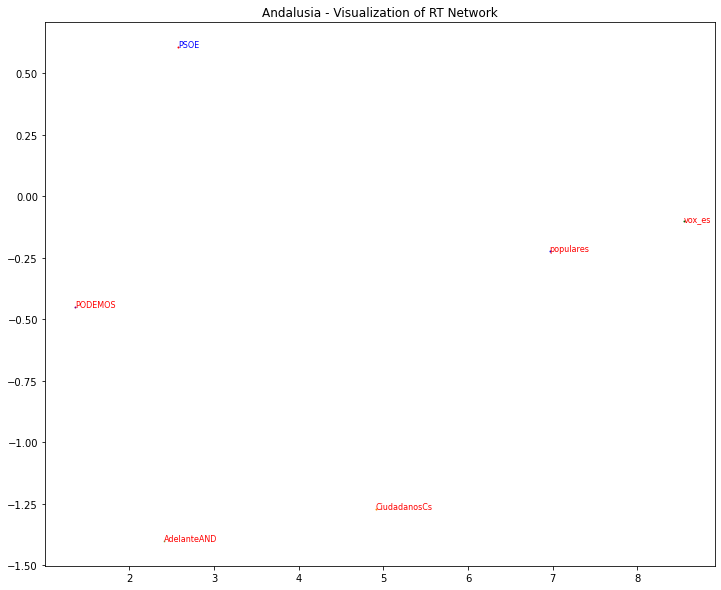

In [9]:
#################################
# VISUALIZE (WIH PARTY NAMES)   #
#################################

COMMUNITIES_LIST = ["VOX", "POR_AND", "PSOE", "PP", "ADELANTE_AND", "CS"]
COLORS_LIST = ["darkgreen", "purple", "red", "blue", "lightgreen", "darkorange"]

def community_color(node_name):
    community = community_dict[node_name]
    index = COMMUNITIES_LIST.index(community)
    color = COLORS_LIST[index]
    return color

# Visualize embeddings in 2D space with node labels
plt.figure(figsize=(12, 10))
#plt.scatter(embedding[:, 0], embedding[:, 1], s=1)
#plt.scatter(positions.values(), c='blue', alpha=0.7)


'''
#Only label top10 in-degree nodes
indeg = G.in_degree(weight='weight')
sorted_indeg = sorted(indeg, key=lambda i: i[1], reverse=True)[:10]
print("Usuaris amb més grau d'ENTRADA:")
print(sorted_indeg)
sorted_indeg_names = [i[0] for i in sorted_indeg]
'''

ideological_position_dict ={}

# Add node labels
party_names = ['vox_es', 'PODEMOS', 'PSOE', 'populares', 'AdelanteAND', 'CiudadanosCs']
for node_name, position in positions.items():
    if position[0]<5000 and position [0]>-5000:
        if position[1]<5000 and position [1]>-5000:
            #plt.scatter(position[0], position[1], c='blue', s=1)
            plt.scatter(position[0], position[1], c=community_color(node_name), s=1)
            if node_name in party_names:
                print(node_name)
                print(position)
                ideological_position_dict [node_name] = [position[0], position[1]]
                #plt.plot(position[0], position[1], c='green', marker="X")
                #plt.text(position[0], position[1], node_name, fontsize=8, c='red')
                if node_name == 'PSOE':
                    plt.text(position[0], position[1], node_name, fontsize=8, c='blue')
                else:
                    plt.text(position[0], position[1], node_name, fontsize=8, c='red')
                

#plt.xlabel('X Dimension')
#plt.xlabel('Y Dimension')
plt.title('Andalusia - Visualization of RT Network')

plt.show()

In [23]:
import pandas as pd

df_raw = pd.DataFrame(positions.items(), columns = [
                 "Party",
                 "Coordinates"
             ]
         )

df_raw

,Party,Coordinates
0,populares,"[6.964197493346599, -0.22264906849971078]"
1,AdelanteAND,"[2.4138890920949465, -1.4024103438379274]"
2,CiudadanosCs,"[4.909874772334969, -1.2720870178538688]"
3,PSOE,"[2.575981191967331, 0.6061101123883292]"
4,vox_es,"[8.551835916803523, -0.10152688049790144]"
5,PODEMOS,"[1.36421217103692, -0.4514939863693347]"


In [26]:
df_raw[['X','Y']] = pd.DataFrame(df_raw.Coordinates.tolist(), index= df_raw.index)
df = pd.DataFrame(df_raw['Coordinates'].to_list(), columns=['X','Y'])
print (df)

          X         Y
0  6.964197 -0.222649
1  2.413889 -1.402410
2  4.909875 -1.272087
3  2.575981  0.606110
4  8.551836 -0.101527
5  1.364212 -0.451494


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
result = pca.fit_transform(df)
print(result)

[[ 2.50922853]
 [-2.08669861]
 [ 0.41256036]
 [-1.84022173]
 [ 4.10055778]
 [-3.09542633]]


In [30]:
scaled_result = [x+5 for x in result]
print(scaled_result)

[array([7.50922853]), array([2.91330139]), array([5.41256036]), array([3.15977827]), array([9.10055778]), array([1.90457367])]
